In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [102]:
df = pd.read_csv('GWAS_hits_v2.csv')

df.head()

np.min(df['POS'])
np.max(df['POS'])

,RSID,CHR,POS,A1,A2,INFO,A1FREQ,Beta,SE,P_BOLT_LMM,HWE_P,INFO.1,Unnamed: 12,POS/ 1000000,Unnamed: 14
0,rs375436054,9,99118,C,T,0.999839,0.553842,5.88998,1.049440,2.000000e-08,0.048262,0.553842,NaN,0.099118,hwp of lesss than -12
1,rs571907709,17,1245171,C,T,0.999755,0.416233,-4.55855,0.762303,2.200000e-09,1.000000,0.416233,NaN,1.245171,NaN
2,rs571444840,7,1386346,T,C,0.999646,0.337856,-3.78316,0.662440,1.100000e-08,1.000000,0.337856,NaN,1.386346,NaN
3,rs550993494,20,1471471,T,G,0.999807,0.718684,-3.86037,0.597305,1.000000e-10,1.000000,0.718684,NaN,1.471471,NaN
4,rs371710155,3,2092920,G,A,0.999821,0.542252,-3.95463,0.716316,3.400000e-08,1.000000,0.542252,NaN,2.092920,easier now with groups withing 5 of each other


99118

248881500

In [65]:
def hist(df, feature='POS', spread=0.1):
    
    # convert to millions
    spread = 10e6*spread
    
    # compute nb of bins
    mini = np.min(df[feature])
    maxi = np.max(df[feature])
    bins = int((maxi-mini)/spread)
    print(bins)
    
    # plot bins
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.hist(df[feature], bins=bins, alpha=0.2)
    ax.scatter(df['POS'], -np.log(df['HWE_P'])/50., marker='.', c='r')
    plt.show()
    

248


/Users/zgubic/Projects/biodata/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


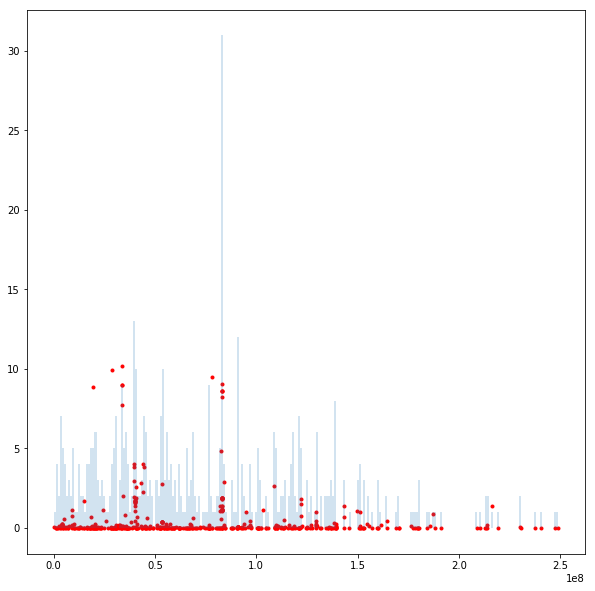

In [66]:
hist(df, spread=0.1)

In [81]:
def kde(df, feature='POS', spread=0.1):
    
    x = df[feature]
    
    # convert to millions
    spread = 10e6*spread
    
    # kernel density
    kde = gaussian_kde(x, bw_method=spread / x.std(ddof=1))
    
    # plotting
    x_plot = np.linspace(np.min(df[feature]), np.max(df[feature]), 10000)
    y_plot = kde.evaluate(x_plot)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_plot, y_plot, alpha=0.2)
    ax.scatter(df['POS'], -np.log(df['HWE_P'])/10e9, marker='.', c='r')
    plt.show()
    

/Users/zgubic/Projects/biodata/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


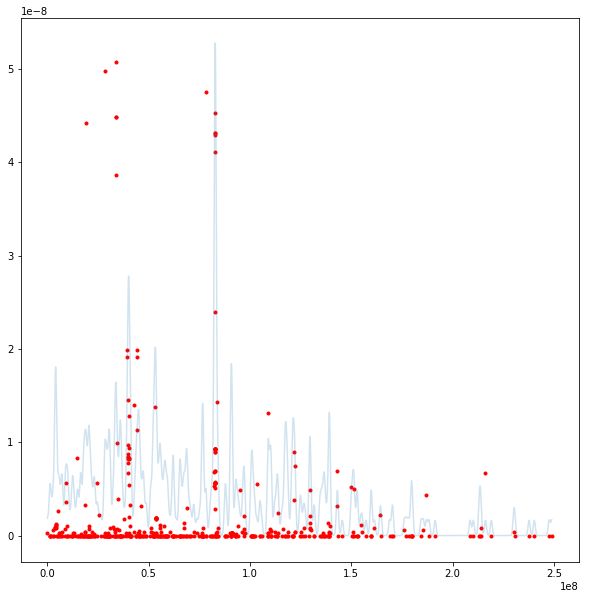

In [82]:
kde(df, spread=0.05)

# Weight them by HWE_P (if that's useful)

In [103]:
def hist(df, spread=0.1):
    
    # convert to millions
    spread = 10e6*spread
    
    # compute nb of bins
    mini = np.min(df['POS'])
    maxi = np.max(df['POS'])
    bins = int((maxi-mini)/spread)
    print(bins)
    
    # plot bins
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.hist(df['POS'], bins=bins, alpha=0.2, weights=df.eval('-log(HWE_P)'))
    ax.scatter(df['POS'], -np.log(df['HWE_P'])*10, marker='.', c='r')
    plt.show()
    
    

248


/Users/zgubic/Projects/biodata/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


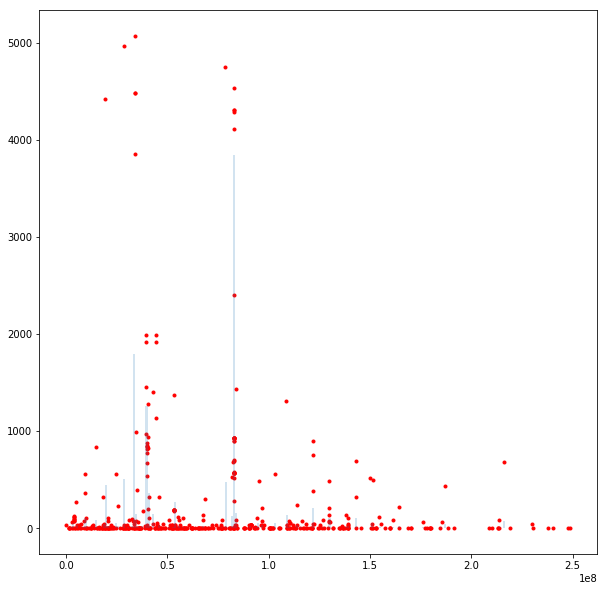

124


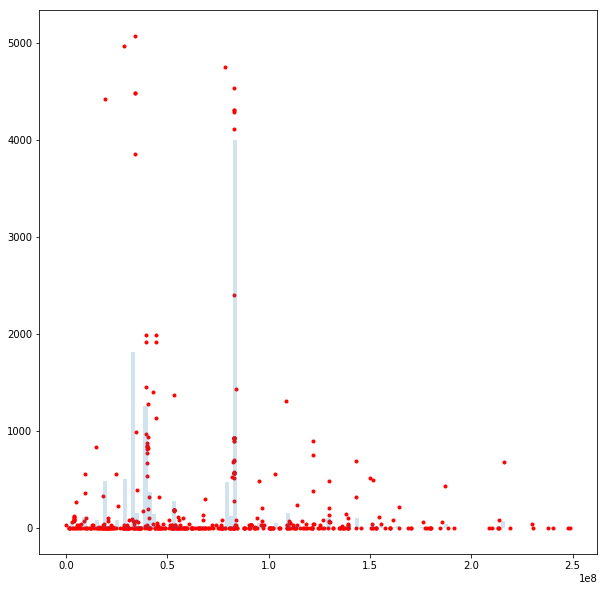

In [104]:
hist(df, spread=0.1)
hist(df, spread=0.2)